In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://www.dropbox.com/s/alw4wehyx8gxb1j/dogs-vs-cats.zip?d1=0
!unzip /content/dogs-vs-cats.zip?d1=0

!unzip /content/train.zip
!unzip /content/test1.zip

In [ ]:
TRAIN_DIR =  "./DATASET"

ORG_DIR = "/content/train"

CLASS = ['cat','dog']

In [ ]:
for C in CLASS:
  DEST = os.path.join(TRAIN_DIR,C)

  if not os.path.exists(DEST):
    os.makedirs(DEST)

  for img_path in glob.glob(os.path.join(ORG_DIR, C)+"*"):
    SRC = img_path

    shutil.copy(SRC, DEST)

**Model Building**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import keras

In [ ]:
base_model = InceptionV3(input_shape=(256,256,3), include_top=False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=2, activation= 'sigmoid')(X)

model = Model(base_model.input, X)

model.compile(optimizer= 'adam', loss = keras.losses.binary_crossentropy, metrics= ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                             

**Pre-Process data using Data Generator**

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center = True,
                                   rotation_range = 0.4,
                                   width_shift_range = 0.3,
                                   horizontal_flip = True,
                                   preprocessing_function = preprocess_input,
                                   zoom_range = 0.4,
                                   shear_range = 0.4)
train_data = train_datagen.flow_from_directory(directory = "/content/DATASET",
                                               target_size = (256,256),
                                               batch_size = 36)

Found 25000 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'cat': 0, 'dog': 1}

**Visualizing the data**

In [ ]:
t_img, label = train_data.next()

In [ ]:
def plotImages(img_arr, label):
  for idx, img in enumerate(img_arr):
    if idx<=10:
      plt.figure(figsize = (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


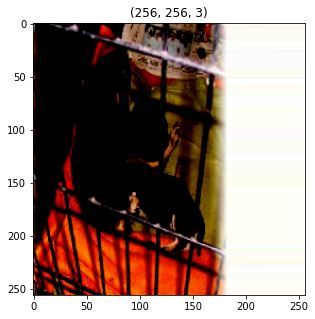

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


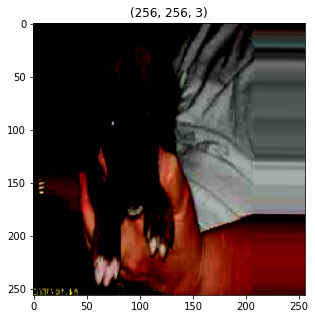

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


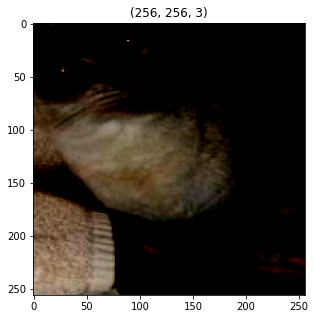

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


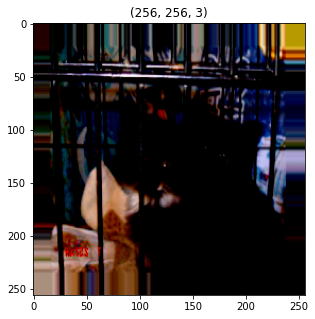

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


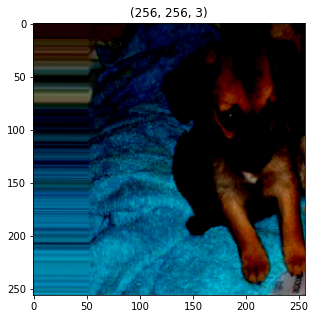

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


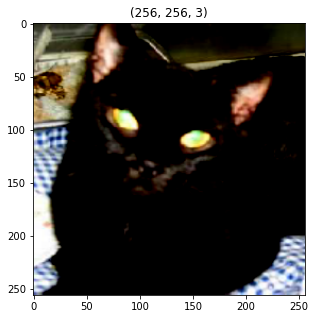

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


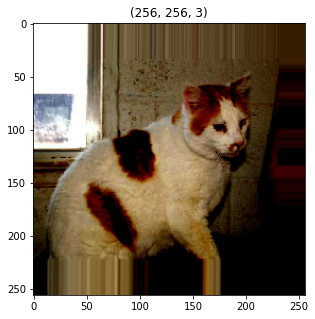

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


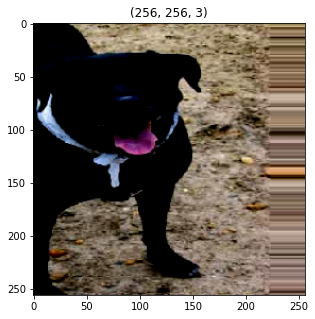

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


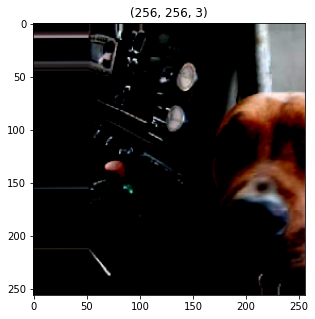

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


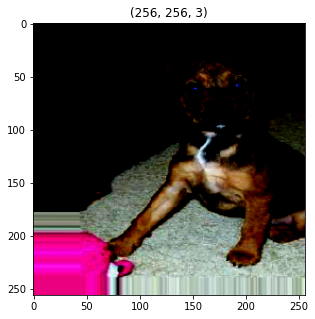

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


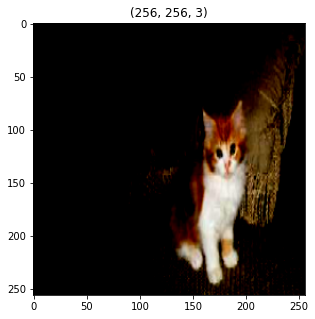

In [ ]:
plotImages(t_img, label)

**Model Check Point**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath = "./best_model.h5",
                     monitor = "accuracy",
                     verbose = 1,
                     save_best_only = True)

es = EarlyStopping(monitor = "accuracy",
                   min_delta = 0.01,
                   patience = 5,
                   verbose = 1)

cb = [mc, es]

In [ ]:
his = model.fit_generator(train_data,
                          steps_per_epoch = 10,
                          epochs = 30,
                          callbacks = cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.3111 - accuracy: 0.9722
Epoch 00001: accuracy improved from -inf to 0.97222, saving model to ./best_model.h5
10/10 [==============================] - 7s 695ms/step - loss: 1.3111 - accuracy: 0.9722
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.2733 - accuracy: 0.9750
Epoch 00002: accuracy improved from 0.97222 to 0.97500, saving model to ./best_model.h5
10/10 [==============================] - 7s 702ms/step - loss: 0.2733 - accuracy: 0.9750
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.2305 - accuracy: 0.9694
Epoch 00003: accuracy did not improve from 0.97500
10/10 [==============================] - 6s 624ms/step - loss: 0.2305 - accuracy: 0.9694
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9722
Epoch 00004: accuracy did not improve from 0.97500
10/10 [==============================] - 6s 618ms/step - loss: 0.1408 - accuracy: 

In [ ]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

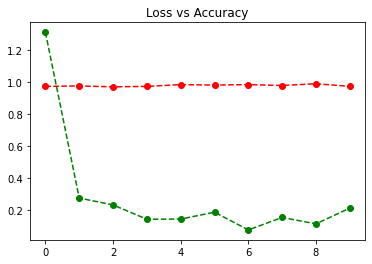

In [ ]:
plt.plot(h['loss'], 'go--')
plt.plot(h['accuracy'], 'go--', c="red")

plt.title("Loss vs Accuracy")
plt.show()

**Validate our Model**

In [ ]:
path = "/content/images (1).jpg"
img = load_img(path, target_size=(256,256))

i = img_to_array(img)

i = preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
  print("The image is of Cat")
else:
  print("The image is of Dog")

# To display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.axis = False
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image is of Dog


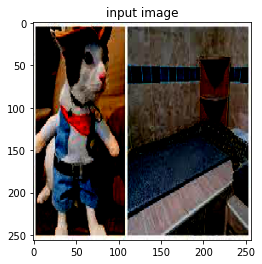

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image is of Cat


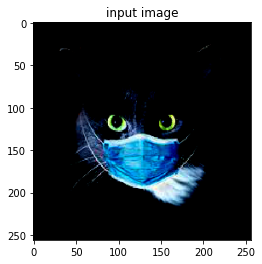

In [ ]:
import os
import PIL
path = "/content/pred"
d = os.listdir(path)
for i in d:
   img = load_img(path + "/" + i, target_size=(256,256))

   i = img_to_array(img)

   i = preprocess_input(i)

   input_arr = np.array([i])
   input_arr.shape

   pred = np.argmax(model.predict(input_arr))

   if pred == 0:
      print("The image is of Cat")
   else:
      print("The image is of Dog")

   # To display the image
   plt.imshow(input_arr[0])
   plt.title("input image")
   plt.axis = False
   plt.show()